In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os

In [ ]:
# 1. Importar el archivo
os.chdir('c:/Users/Jess/Downloads/BD')
df_sm_sales = pd.read_csv('supermarket_sales.csv')
df_sm_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
# 1.1. Verificar el tipo de dato de las columnas
df_sm_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# 1.2. Revisar la cantidad de valores nulos en el df
print(df_sm_sales.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [ ]:
# 1.3. Obtener un resumen del df
df_sm_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
# 2. Calcular la media, mediana y moda de las columnas 'Unit price' y 'Quantity'
price_quantity_np = df_sm_sales[['Unit price', 'Quantity']].to_numpy()


In [ ]:
mean_values = np.mean(price_quantity_np, axis=0)
median_values = np.median(price_quantity_np, axis=0)
mode_values = stats.mode(price_quantity_np, axis=0, keepdims=True).mode[0]

In [ ]:
mean_values = np.round(mean_values, 2)

In [ ]:
results_price_quantity = pd.DataFrame({'mean': mean_values, 'median': median_values, 'mode': mode_values}, index=['unit_price', 'quantity'])
print(results_price_quantity)


             mean  median   mode
unit_price  55.67   55.23  83.77
quantity     5.51    5.00  10.00


In [ ]:
# 3. Obtener el ticket promedio por 'City'
df_sm_sales.groupby('City')['Total'].mean().sort_values(ascending=False)

City
Naypyitaw    337.099715
Mandalay     319.872506
Yangon       312.354031
Name: Total, dtype: float64

In [ ]:
# 4. Obtener el ticket promedio por 'City' y 'Product line'
df_sm_sales.groupby(['City', 'Product line'])['Total'].mean()

City       Product line          
Mandalay   Electronic accessories    310.026245
           Fashion accessories       264.730911
           Food and beverages        304.297770
           Health and beauty         376.993585
           Home and lifestyle        350.983290
           Sports and travel         322.390306
Naypyitaw  Electronic accessories    344.890445
           Fashion accessories       331.693385
           Food and beverages        360.103864
           Health and beauty         319.525500
           Home and lifestyle        308.790067
           Sports and travel         350.265067
Yangon     Electronic accessories    305.285225
           Fashion accessories       320.245265
           Food and beverages        295.915526
           Health and beauty         268.037298
           Home and lifestyle        344.879931
           Sports and travel         328.350839
Name: Total, dtype: float64

In [ ]:
# 5. Obtener el ticket promedio por 'Gender'
df_sm_sales.groupby('Gender')['Total'].mean()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

In [ ]:
# 6. Obtener el ticket promedio por 'Gender' y 'Product line'
df_sm_sales.groupby(['Gender', 'Product line'])['Total'].mean()

Gender  Product line          
Female  Electronic accessories    322.643125
        Fashion accessories       317.056250
        Food and beverages        368.565750
        Health and beauty         290.015414
        Home and lifestyle        380.213639
        Sports and travel         324.712739
Male    Electronic accessories    316.691965
        Fashion accessories       291.079207
        Food and beverages        273.499125
        Health and beauty         348.099460
        Home and lifestyle        294.136241
        Sports and travel         340.360327
Name: Total, dtype: float64

In [ ]:
# 7. Generar el top 5 de ventas por 'City'
city_np = df_sm_sales[['City', 'Total']].to_numpy()

cities = np.unique(city_np[:,0])

top5_by_city = {}

for city in cities:
    mask = city_np[:,0] == city
    city_sales = city_np[mask, 1].astype(float)
    idx_sorted = np.argsort(-city_sales)
    top5_sales = city_sales[idx_sorted[:5]]
    top5_by_city[city] = [(i+1, round(val, 2)) for i, val in enumerate(top5_sales)]

In [ ]:
for city, ranking in top5_by_city.items():
    print(f"\nTop 5 ventas en {city}")
    print("{:<5} {:>10}".format("Rank", "Total"))
    print("-" * 20)
    for rank, total in ranking:
        print("{:<5} {:>10.2f}".format(rank, total))


Top 5 ventas en Mandalay
Rank       Total
--------------------
1        1022.49
2        1022.38
3         944.62
4         942.45
5         922.64

Top 5 ventas en Naypyitaw
Rank       Total
--------------------
1        1042.65
2        1034.46
3        1023.75
4        1020.70
5        1003.59

Top 5 ventas en Yangon
Rank       Total
--------------------
1        1039.29
2         951.82
3         932.34
4         931.04
5         926.95


In [ ]:
# 8. Generar el top 5 de ventas por 'Customer type'
df_sm_sales.groupby('Customer type')['Total'].nlargest(5)

Customer type     
Member         350    1042.650
               557    1034.460
               422    1020.705
               429     951.825
               141     950.250
Normal         167    1039.290
               699    1023.750
               996    1022.490
               792    1022.385
               166    1003.590
Name: Total, dtype: float64

In [ ]:
# 9. Generar el top 5 de ventas por 'Payment'. 

top5_payment = (df_sm_sales.groupby('Payment')['Total'].nlargest(5).reset_index())
top5_payment['rank'] = top5_payment.groupby('Payment').cumcount() + 1

print(top5_payment)

        Payment  level_1      Total  rank
0          Cash      166  1003.5900     1
1          Cash      357  1002.1200     2
2          Cash      141   950.2500     3
3          Cash      941   943.2990     4
4          Cash      611   935.2665     5
5   Credit card      350  1042.6500     1
6   Credit card      167  1039.2900     2
7   Credit card      792  1022.3850     3
8   Credit card      422  1020.7050     4
9   Credit card      122   944.6220     5
10      Ewallet      557  1034.4600     1
11      Ewallet      699  1023.7500     2
12      Ewallet      996  1022.4900     3
13      Ewallet      429   951.8250     4
14      Ewallet      435   937.8180     5


In [ ]:
# 9.1. Incluir el % de aporte de cada categoría de 'Payment'
df_sm_sales.groupby('Payment')['Total'].sum().pipe(lambda s: pd.DataFrame({'Total': s, 'Percentage': (s/s.sum()*100).round(2)})).sort_values('Percentage', ascending=False)

,Total,Percentage
Payment,,
Cash,112206.570,34.74
Ewallet,109993.107,34.06
Credit card,100767.072,31.20


In [ ]:
# 10. Generar el top 3 de ventas por 'Product line'.

df_sm_sales['Rank'] = (df_sm_sales.groupby('Product line')['Total'].rank(method='first', ascending=False))
top3_product = df_sm_sales[df_sm_sales['Rank'] <= 3].sort_values(['Product line','Rank'])

print(top3_product[['Product line','Total','Rank']])

               Product line      Total  Rank
209  Electronic accessories   942.4485   1.0
105  Electronic accessories   931.0350   2.0
988  Electronic accessories   864.5700   3.0
350     Fashion accessories  1042.6500   1.0
167     Fashion accessories  1039.2900   2.0
422     Fashion accessories  1020.7050   3.0
557      Food and beverages  1034.4600   1.0
70       Food and beverages   939.5400   2.0
561      Food and beverages   936.6000   3.0
141       Health and beauty   950.2500   1.0
96        Health and beauty   922.6350   2.0
158       Health and beauty   918.7290   3.0
699      Home and lifestyle  1023.7500   1.0
996      Home and lifestyle  1022.4900   2.0
792      Home and lifestyle  1022.3850   3.0
357       Sports and travel  1002.1200   1.0
122       Sports and travel   944.6220   2.0
140       Sports and travel   942.9000   3.0


In [ ]:
# 10. Obtener una matriz de correlación entre la hora (sin minutos) y el total 
hour_np = df_sm_sales['Time'].str.split(':').str[0].astype(int).to_numpy()
total_np = df_sm_sales['Total'].to_numpy()

In [ ]:
corr = np.corrcoef(hour_np, total_np)[0,1]
print('La correlación entre hora y total es:', corr)

La correlación entre hora y total es: -0.0027704400032559215


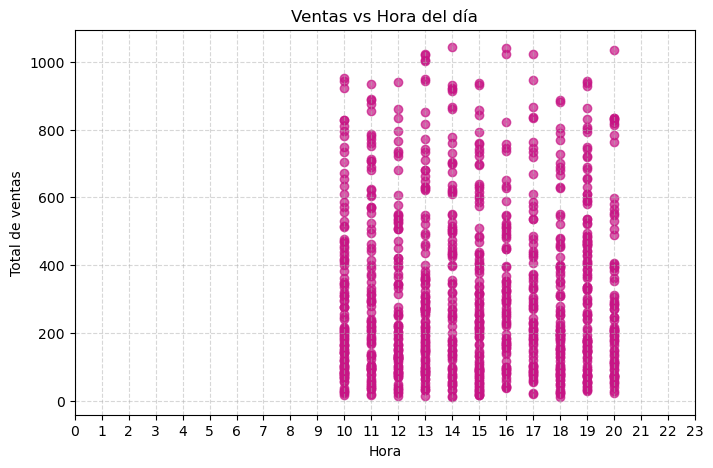

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(hour_np, total_np, alpha=0.7, color='mediumvioletred')

plt.title("Ventas vs Hora del día")
plt.xlabel("Hora")
plt.ylabel("Total de ventas")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [ ]:
# 11. Obtener una matriz de correlación entre el 'Unit price' y el 'gross income' de la transacción, para validar si los productos más caros son los que dejan más margen.
price_np = df_sm_sales['Unit price'].to_numpy()
gross_np = df_sm_sales['gross income'].to_numpy()

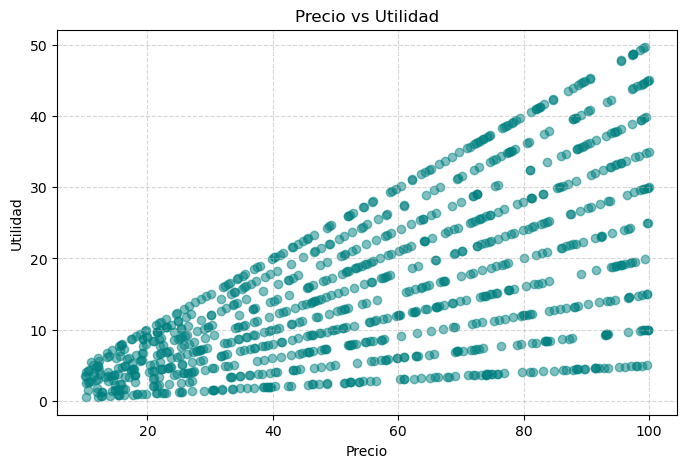

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(price_np, gross_np, alpha=0.5, color='teal')

plt.title("Precio vs Utilidad")
plt.xlabel("Precio")
plt.ylabel("Utilidad")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()